In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [47]:
path1 = '/Users/kimtaehyeong/Desktop/02_앞면_윗니 정면'
os.chdir(path1)
files1 = os.listdir(path1) # 파일 폴더명 반환

data = []
for file in files1:
    f = cv2.imread(file)
    data.append(f)


Premature end of JPEG file
Premature end of JPEG file


In [48]:
len(data)

5502

In [49]:
# train, test 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               test_size=0.15,
                               shuffle=True,
                               random_state=42)

In [50]:
print(len(train))
print(len(test))

4676
826


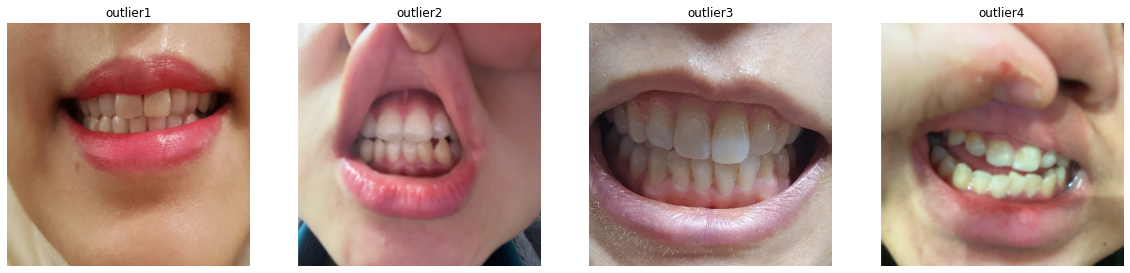

In [51]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(cv2.cvtColor(test[-i], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier{i}')
    plt.axis('off')
plt.show()

In [52]:
train = np.array(train)
print(train.shape)

(4676, 448, 448, 3)


In [53]:
def image_resize(data_set, n_pixel):
    # create empty list
    resized_list = []
    # resize to n pixel 
    for i in range(len(data_set)):
        resized = cv2.resize(data_set[i], dsize=(n_pixel,n_pixel), interpolation=cv2.INTER_CUBIC)
        resized_list.append(resized)
        
    return resized_list

In [58]:
train_resize_256 = image_resize(train, 256)
test_resize_256 = image_resize(test, 256)

In [57]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
train = np.array(train_resize_256)
test = np.array(test_resize_256)

In [62]:
# data normalization
train_normalization = train/255
test_normalization = test/255

In [71]:
# CNN (실패)
'''
model = keras.Sequential([
    keras.layers.Conv2D(input_shape = (256,256,3), kernel_size=(3,3), strides=(2,2), padding='same', filters=16),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Conv2D(kernel_size=(3,3),padding='same',filters=32),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Conv2D(kernel_size=(3,3),padding='same',filters=64),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10,activation='softmax')
])
'''

"\nmodel = keras.Sequential([\n    keras.layers.Conv2D(input_shape = (256,256,3), kernel_size=(3,3), strides=(2,2), padding='same', filters=16),\n    keras.layers.MaxPool2D(strides=(2,2)),\n    keras.layers.Conv2D(kernel_size=(3,3),padding='same',filters=32),\n    keras.layers.MaxPool2D(strides=(2,2)),\n    keras.layers.Conv2D(kernel_size=(3,3),padding='same',filters=64),\n    keras.layers.Flatten(),\n    keras.layers.Dense(units=128, activation='relu'),\n    keras.layers.Dropout(rate=0.3),\n    keras.layers.Dense(units=10,activation='softmax')\n])\n"

In [72]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(9,9), activation='relu', 
                        input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)), # pooling method 선택 이유 공부
    keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 32)      7808      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)      

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [74]:
train_target = np.ones(len(train))

In [76]:
history = model.fit(train_normalization, train_target, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
147/147 [==============================] - 173s 1s/step - loss: 0.3578 - accuracy: 0.9596
Epoch 2/10
147/147 [==============================] - 198s 1s/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3/10
147/147 [==============================] - 191s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/10
147/147 [==============================] - 187s 1s/s